In [ ]:
remittances
basic needs
urban rural remittances
income vs remittances
basic neeeds remittances vs non-remittances

In [2]:
import pandas as pd
import numpy as np
# from Analytical_Functions import * 
import matplotlib 
from matplotlib import pyplot as plt

In [3]:
main_df = pd.read_csv('data/main_table.csv')
hh_df = pd.read_csv('data/hh_roster.csv')
ext_df = pd.read_csv('data/mig_ext_roster.csv')
lut = pd.read_csv('data/answer_lookup.csv', usecols=[0,1,2,3], index_col='label')
lut = lut.rename(columns={'text_content':'response'})
main_lut = pd.read_csv('data/main_lookup.csv', index_col='label')

In [4]:
df = pd.read_csv('vars_of_interest_v2.csv',index_col=0)

In [5]:
df

,avg_income_currency,avg_income_amount,AVG_INCOME_USD,country,rural_urban,remesa_currency,remesa_amount,REMESA_AMOUNT_USD,remesa_freq,REMESA_AMOUNT_REGPERMONTH,...,pct_remit_towards_Housing(constructionorrepair),pct_remit_towards_Housingrentalfee,pct_remit_towards_Homepurchasefee,pct_remit_towards_Purchaseofagriculturalinputs,pct_remit_towards_Business(trade),pct_remit_towards_Saving,pct_remit_towards_Paymentofcommitmentsofmembersresidingabroad,pct_remit_towards_Paymentofthesender'straveldebt,pct_remit_towards_Paymentofotherdebts,pct_remit_towards_Other
0,NaN,NaN,NaN,SLV,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,500.0,500.000,SLV,2,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,300.0,300.000,SLV,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,350.0,350.000,SLV,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,347.0,347.000,SLV,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3.0,260.0,10.660,GT,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994,3.0,247.0,10.127,GT,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,3.0,650.0,26.650,GT,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,3.0,65.0,2.665,GT,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['hh_size'] = main_df.hh_size

In [7]:
df.loc[df.hh_size == 0,'hh_size'] = 1

In [8]:
df['AVG_INCOME_USD_PERCAP'] = df['AVG_INCOME_USD'] / df['hh_size']

In [9]:
df['REMESA_AMOUNT_REGPERMONTH_PERCAP'] = df['REMESA_AMOUNT_REGPERMONTH'] / df['hh_size']

In [10]:
df.columns

Index(['avg_income_currency', 'avg_income_amount', 'AVG_INCOME_USD', 'country',
       'rural_urban', 'remesa_currency', 'remesa_amount', 'REMESA_AMOUNT_USD',
       'remesa_freq', 'REMESA_AMOUNT_REGPERMONTH', 'remittances_yn',
       'remesa_amount_consent', 'avg_income_consent',
       'pct_remit_towards_Foodpurchase',
       'pct_remit_towards_Healthexpenses(medicines/medicalconsultation)',
       'pct_remit_towards_ExpensesrelatedtoCOVID-19(protectionsupplies,medicalconsultation,medicines)',
       'pct_remit_towards_Educationexpenses',
       'pct_remit_towards_Paymentofservices(water,electricity,cable,internet,communication)',
       'pct_remit_towards_Clothesandshoes',
       'pct_remit_towards_Housing(constructionorrepair)',
       'pct_remit_towards_Housingrentalfee',
       'pct_remit_towards_Homepurchasefee',
       'pct_remit_towards_Purchaseofagriculturalinputs',
       'pct_remit_towards_Business(trade)', 'pct_remit_towards_Saving',
       'pct_remit_towards_Paymentofcomm

In [11]:
df.loc[:,[col for col in df.columns if 'pct_remit_towards' in col ]] = df.loc[:,[col for col in df.columns if 'pct_remit_towards' in col ]].fillna(0)

In [12]:
goods = ['fridge_yn','washer_yn','computer_yn','internet_yn','tv_yn','cable_yn','gas_yn','landline_yn','heater_yn','aircon_yn','microwave_yn','watertank_yn','car_yn','stereo_yn']


In [13]:
df[goods] = main_df[goods]

In [47]:
df[goods]

,fridge_yn,washer_yn,computer_yn,internet_yn,tv_yn,cable_yn,gas_yn,landline_yn,heater_yn,aircon_yn,microwave_yn,watertank_yn,car_yn,stereo_yn
0,1,0,0,1,1,1,1,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,1,1,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4994,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4995,1,0,0,0,1,1,1,0,0,0,1,1,0,1
4996,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df[goods] = df[goods].dropna()

In [42]:
df.groupby('remittances_yn')[goods].mean()

,fridge_yn,washer_yn,computer_yn,internet_yn,tv_yn,cable_yn,gas_yn,landline_yn,heater_yn,aircon_yn,microwave_yn,watertank_yn,car_yn,stereo_yn
remittances_yn,,,,,,,,,,,,,,
0,0.545583,0.092865,0.124575,0.142978,0.641846,0.390430,0.471687,0.057758,0.026614,0.020951,0.123443,0.094847,0.246886,0.294168
1,0.834140,0.215619,0.243953,0.327574,0.835522,0.606773,0.723566,0.093296,0.042156,0.061507,0.241189,0.167934,0.360055,0.425017
99,0.421053,0.052632,0.052632,0.210526,0.578947,0.368421,0.368421,0.105263,0.052632,0.000000,0.052632,0.052632,0.315789,0.105263


In [41]:
df.groupby('remittances_yn')[goods].std()

,fridge_yn,washer_yn,computer_yn,internet_yn,tv_yn,cable_yn,gas_yn,landline_yn,heater_yn,aircon_yn,microwave_yn,watertank_yn,car_yn,stereo_yn
remittances_yn,,,,,,,,,,,,,,
0,0.497988,0.290285,0.330283,0.350100,0.479526,0.487916,0.499268,0.233318,0.160975,0.143242,0.328991,0.293045,0.431261,0.455732
1,0.372084,0.411393,0.429613,0.469491,0.370837,0.488635,0.447389,0.290948,0.201015,0.240340,0.427952,0.373937,0.480182,0.494517
99,0.507257,0.229416,0.229416,0.418854,0.507257,0.495595,0.495595,0.315302,0.229416,0.000000,0.229416,0.229416,0.477567,0.315302


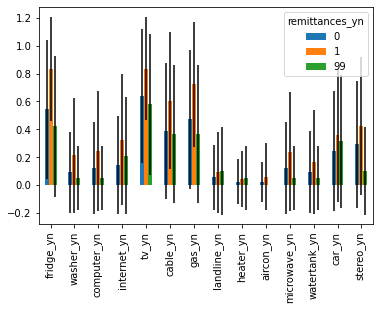

In [16]:
df.groupby('remittances_yn')[goods].mean().T.plot.bar(yerr = df.groupby('remittances_yn')[goods].std().T)
plt.show()

In [52]:
fig_df.index = ['No Remit','Yes Remit','NS/NR Remit']

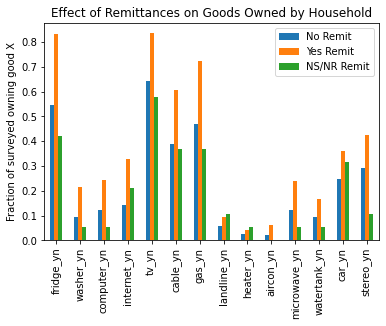

In [53]:
fig_df.T.plot.bar()
plt.title('Effect of Remittances on Goods Owned by Household')
plt.ylabel('Fraction of surveyed owning good X')
plt.show()